In [ ]:
# Step 1: Install required packages (optional — most are preinstalled in Colab)
!pip install opencv-python-headless matplotlib


In [ ]:
# Step 2: Upload GeoJSON and Image
from google.colab import files
uploaded = files.upload()

Saving test.geojson to test.geojson


In [ ]:
# Step 3: Load GeoJSON
import json

with open("test.geojson", "r") as f:
    data = json.load(f)

# Step 4: Extract polygon coordinates
polygons = []
for feature in data['features']:
    geometry = feature['geometry']
    label = feature.get('properties', {}).get('classification', {}).get('name', 'Unknown')

    if geometry['type'] == 'Polygon':
        coords = geometry['coordinates'][0]
        polygons.append((label, coords))
    elif geometry['type'] == 'MultiPolygon':
        for poly in geometry['coordinates']:
            coords = poly[0]
            polygons.append((label, coords))

print(f"Extracted {len(polygons)} polygons.")


Extracted 815 polygons.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving T2023-23L_Platyrrhinus_helleri-LY24-1-5C_fruit_middle_AB_LY24-1-5C AB 1-2.tif to T2023-23L_Platyrrhinus_helleri-LY24-1-5C_fruit_middle_AB_LY24-1-5C AB 1-2.tif


##IF YOU WANT A PNG OUTPUT

Annotated image saved to annotated_goblet_cells.png


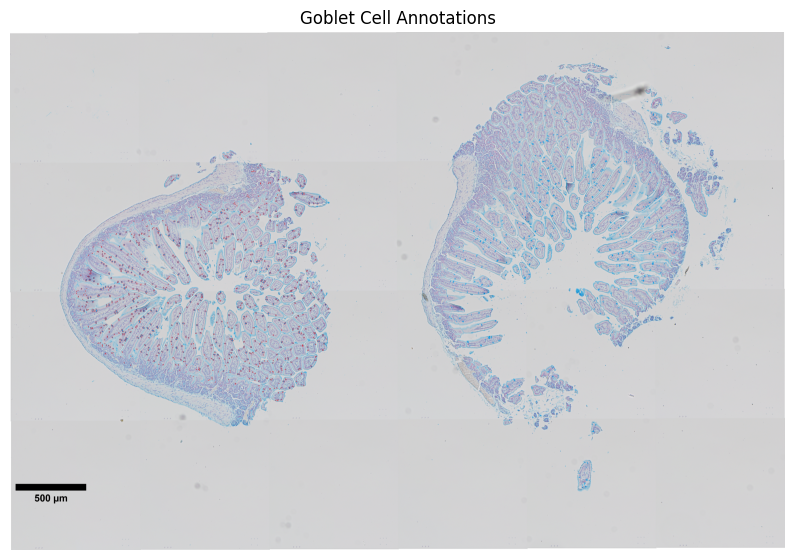

In [ ]:
# Step 5: Overlay polygons on the image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("T2023-23L_Platyrrhinus_helleri-LY24-1-5C_fruit_middle_AB_LY24-1-5C AB 1-2.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw polygons
for label, coords in polygons:
    pts = np.array(coords, np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.polylines(img, [pts], isClosed=True, color=(255, 0, 0), thickness=2)

output_path = "annotated_goblet_cells.png"
cv2.imwrite(output_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))  # convert back to BGR for saving
print(f"Annotated image saved to {output_path}")

# Display
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title("Goblet Cell Annotations")
plt.axis('off')
plt.show()


## .TIF OUTPUT FILE

Saved annotated image to: annotated_goblet_cells.tif


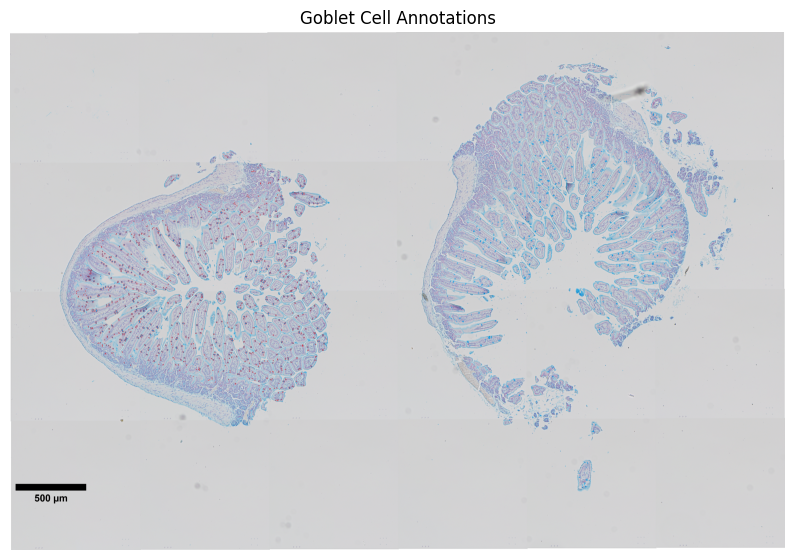

In [ ]:
# Install dependencies (run only once)
!pip install tifffile shapely matplotlib

import tifffile
import numpy as np
import matplotlib.pyplot as plt
import json
from shapely.geometry import shape
import cv2

# --- Step 1: Load original TIFF image ---
input_tif_path = 'T2023-23L_Platyrrhinus_helleri-LY24-1-5C_fruit_middle_AB_LY24-1-5C AB 1-2.tif'
image = tifffile.imread(input_tif_path)
# Extract metadata as a dictionary (optional)
with tifffile.TiffFile(input_tif_path) as tif:
    tags = tif.pages[0].tags
    description = tags.get('ImageDescription')
    metadata = {'description': description.value if description else ''}

# Convert to RGB if grayscale
if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
elif image.shape[0] in [3, 4]:  # If channels-first
    image = np.moveaxis(image, 0, -1)

# --- Step 2: Load GeoJSON annotations ---
geojson_path = 'test.geojson'
with open(geojson_path) as f:
    data = json.load(f)

# --- Step 3: Draw polygons ---
for feature in data['features']:
    geom = shape(feature['geometry'])
    if geom.geom_type == 'Polygon':
        coords = np.array(geom.exterior.coords, dtype=np.int32)
        coords = coords.reshape((-1, 1, 2))
        cv2.polylines(image, [coords], isClosed=True, color=(255, 0, 0), thickness=2)

# --- Step 4: Save annotated image as TIFF ---
output_tif_path = 'annotated_goblet_cells.tif'
tifffile.imwrite(output_tif_path, image, description=metadata['description'])
print(f"Saved annotated image to: {output_tif_path}")


# Optional: Display
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Goblet Cell Annotations")
plt.show()
